<img src="./images/banner.png" width="800">

# Regression Plots in Seaborn

Regression plots are powerful tools for visualizing and understanding relationships between variables in a dataset. Seaborn, a statistical data visualization library built on top of Matplotlib, provides elegant and informative ways to create these plots. In this lecture, we'll explore how to use Seaborn to create and interpret regression plots.


Regression plots are visualizations that display the relationship between two variables and fit a regression model to the data. These plots typically consist of:

1. A scatter plot of the raw data points
2. A regression line representing the fitted model
3. A shaded area indicating the confidence interval of the model


🔑 **Key Concept:** Regression plots help us visualize both the raw data and the statistical relationship between variables simultaneously.


Seaborn offers several advantages for creating regression plots:

1. **Simplicity:** Seaborn provides high-level functions that make it easy to create complex statistical visualizations with minimal code.
2. **Statistical integration:** It automatically calculates and displays regression lines and confidence intervals.
3. **Aesthetics:** Seaborn plots are visually appealing and publication-ready out of the box.
4. **Flexibility:** It offers various options for customization and handling different types of data.


Seaborn provides two primary functions for creating regression plots:

1. `regplot()`: An axes-level function for simple regression plots.
2. `lmplot()`: A figure-level function that combines `regplot()` with `FacetGrid` for more complex visualizations.


Here's a simple example using `regplot()`:


Text(0.5, 1.0, 'Relationship between Total Bill and Tip')

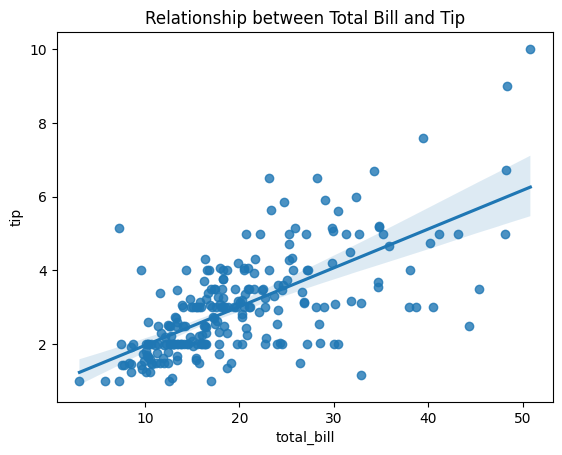

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset("tips")

# Create a basic regression plot
sns.regplot(x="total_bill", y="tip", data=tips)
plt.title("Relationship between Total Bill and Tip")

💡 **Pro Tip:** While `regplot()` and `lmplot()` produce similar plots, `lmplot()` offers more advanced features like faceting and grouping by categorical variables.


Regression plots serve several important purposes in data analysis:

1. **Visualizing relationships:** They help identify patterns and trends between variables.
2. **Assessing linearity:** The plots can reveal whether a linear model is appropriate for the data.
3. **Identifying outliers:** Unusual data points that deviate from the overall pattern become apparent.
4. **Communicating results:** They provide an intuitive way to present statistical relationships to both technical and non-technical audiences.


Understanding how to create and interpret regression plots is crucial for exploratory data analysis, hypothesis testing, and communicating findings in data science projects.


The basic linear regression model underlying these plots can be expressed as:

$y = \beta_0 + \beta_1x + \epsilon$

Where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $\beta_0$ is the y-intercept
- $\beta_1$ is the slope
- $\epsilon$ is the error term


Seaborn's regression plots visualize this relationship and provide an estimate of the parameters $\beta_0$ and $\beta_1$.


In the following sections, we'll dive deeper into creating various types of regression plots, handling different data scenarios, and exploring advanced features of Seaborn's regression plotting capabilities.

**Table of contents**<a id='toc0_'></a>    
- [Regression Visualization with `regplot()`](#toc1_)    
  - [Customizing `regplot()`](#toc1_1_)    
  - [Discrete X Variables](#toc1_2_)    
  - [Binary Y Variables](#toc1_3_)    
  - [Robust Regression](#toc1_4_)    
- [Regression Visualization with `lmplot()`](#toc2_)    
  - [Exploring Subgroups with `lmplot()`](#toc2_1_)    
  - [Customizing `lmplot()`](#toc2_2_)    
- [Residual Analysis with `residplot()`](#toc3_)    
  - [Interpreting Residual Plots](#toc3_1_)    
  - [Advanced Usage of `residplot()`](#toc3_2_)    
- [Regression in Other Contexts: `jointplot()` and `pairplot()`](#toc4_)    
  - [`jointplot()`: Combining Regression with Marginal Distributions](#toc4_1_)    
  - [`pairplot()`: Visualizing Pairwise Relationships](#toc4_2_)    
- [Summary](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Regression Visualization with `regplot()`](#toc0_)

The `regplot()` function in Seaborn is a versatile and powerful tool for visualizing the relationship between two variables and fitting a regression model. It's an axes-level function that combines a scatter plot of the data with a fitted regression line, providing a quick and informative view of the data's structure and trends.


🔑 **Key Concept:** `regplot()` is excellent for initial data exploration and for communicating simple regression analyses.


Let's start with a basic example using the 'mpg' dataset, which contains information about various car models:


Text(0, 0.5, 'Miles per Gallon')

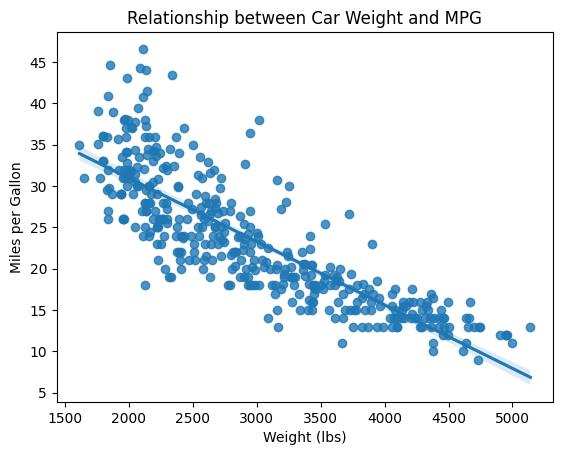

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
mpg = sns.load_dataset("mpg")

# Create a basic regression plot
sns.regplot(data=mpg, x="weight", y="mpg")
plt.title("Relationship between Car Weight and MPG")
plt.xlabel("Weight (lbs)")
plt.ylabel("Miles per Gallon")

This plot shows the relationship between a car's weight and its fuel efficiency (mpg). The scatter points represent individual cars, while the blue line is the fitted regression line. The shaded area around the line represents the 95% confidence interval.


`regplot()` is ideal when you want to:

1. Explore the relationship between two continuous variables
2. Visualize both the raw data and the regression model in a single plot
3. Quickly assess whether a linear relationship exists between variables
4. Identify potential outliers or influential points


However, it may not be the best choice when:

1. You need to visualize relationships across multiple subgroups (use `lmplot()` instead)
2. You're dealing with very large datasets where overplotting becomes an issue
3. You want to show complex, multi-dimensional relationships (consider other plot types)


### <a id='toc1_1_'></a>[Customizing `regplot()`](#toc0_)


Seaborn's `regplot()` offers various customization options to enhance your visualizations:

1. Changing the Order of the Regression


To capture non-linear relationships, you can increase the order of the polynomial regression:


Text(0.5, 1.0, 'Non-linear Relationship: Horsepower vs MPG')

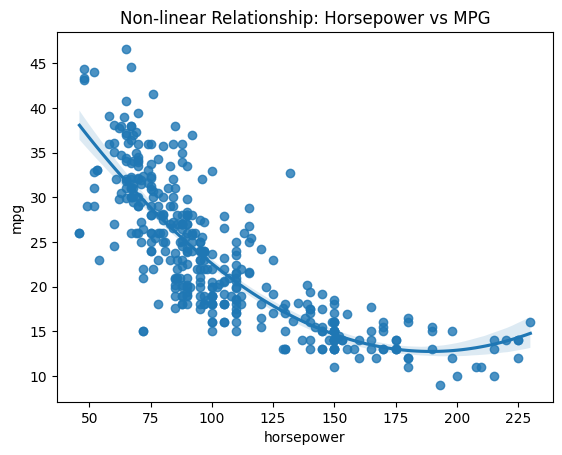

In [3]:
sns.regplot(data=mpg, x="horsepower", y="mpg", order=2)
plt.title("Non-linear Relationship: Horsepower vs MPG")

This plot will show a curved line that better fits the data if there's a non-linear relationship.


2. Using Logarithmic Scales


For data with exponential relationships, using a logarithmic scale can be helpful:


Text(0.5, 1.0, 'Log-Linear Relationship: Engine Displacement vs MPG')

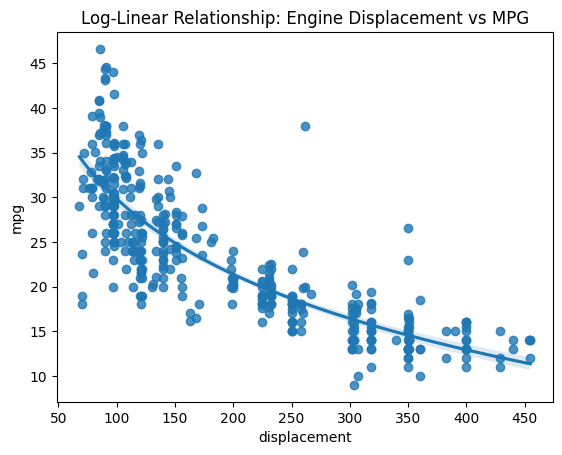

In [4]:
sns.regplot(data=mpg, x="displacement", y="mpg", logx=True)
plt.title("Log-Linear Relationship: Engine Displacement vs MPG")

This is particularly useful when dealing with variables that span several orders of magnitude.


3. Applying LOWESS Smoothing


For a non-parametric approach, you can use LOWESS (Locally Weighted Scatterplot Smoothing):


Text(0.5, 1.0, 'LOWESS Smoothing: Car Weight vs MPG')

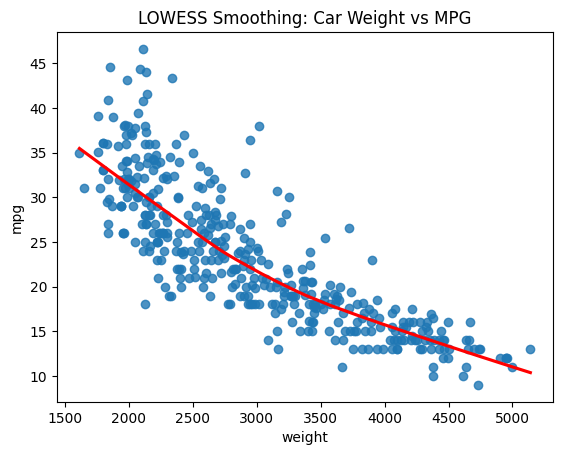

In [5]:
sns.regplot(data=mpg, x="weight", y="mpg", lowess=True, line_kws={"color": "red"})
plt.title("LOWESS Smoothing: Car Weight vs MPG")

LOWESS is great for revealing complex, non-linear relationships without assuming a specific functional form.


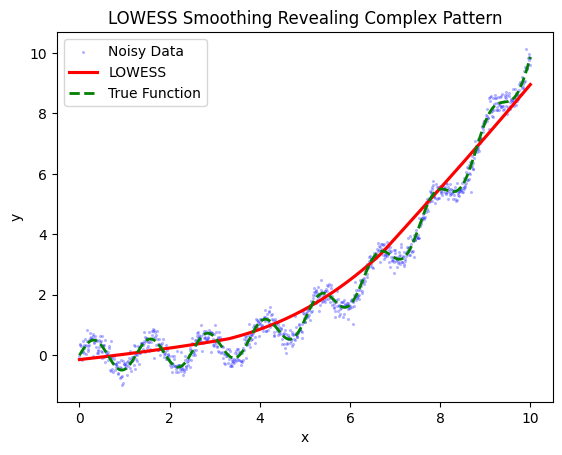

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate complex data
n = 1000
x = np.linspace(0, 10, n)
y = 0.5 * np.sin(5 * x) + x**3 * 0.01

# Add some noise
noise = np.random.normal(0, 0.2, n)
y_noisy = y + noise

# Create a DataFrame
df = pd.DataFrame({"x": x, "y": y_noisy})

# Scatter plot of noisy data
sns.scatterplot(x="x", y="y", data=df, alpha=0.3, color="blue", label="Noisy Data", s=5)

# LOWESS smoothing
sns.regplot(
    x="x",
    y="y",
    data=df,
    lowess=True,
    scatter=False,
    color="red",
    label="LOWESS",
)

# Add the true underlying function
plt.plot(x, y, color="green", linestyle="--", linewidth=2, label="True Function")

# Customize the plot
plt.title("LOWESS Smoothing Revealing Complex Pattern")
plt.legend(fontsize=10)


🤔 **Why This Matters:** Different regression techniques can reveal different aspects of your data. Experimenting with these options can lead to deeper insights.


4. Customizing Appearance


You can adjust the appearance of both the scatter points and the regression line:


Text(0.5, 1.0, 'Customized Regression Plot: Weight vs Horsepower')

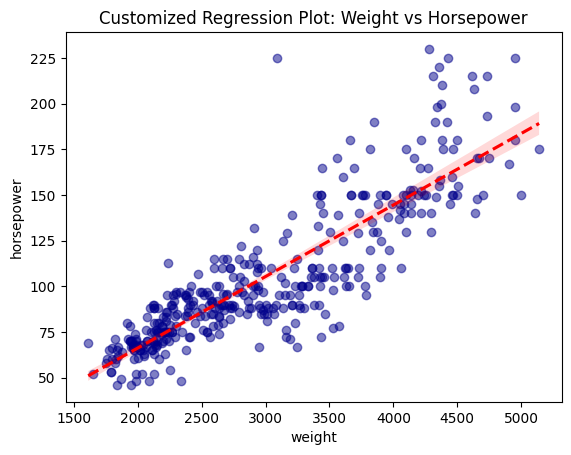

In [7]:
sns.regplot(
    data=mpg,
    x="weight",
    y="horsepower",
    scatter_kws={"color": "darkblue", "alpha": 0.5},
    line_kws={"color": "red", "linestyle": "--"},
)
plt.title("Customized Regression Plot: Weight vs Horsepower")

This level of customization allows you to create plots that match your presentation style or emphasize specific aspects of the data.


### <a id='toc1_2_'></a>[Discrete X Variables](#toc0_)


When dealing with **discrete x variables**, jittering can help visualize the distribution:


Text(0.5, 1.0, 'Jittered Plot: Number of Cylinders vs MPG')

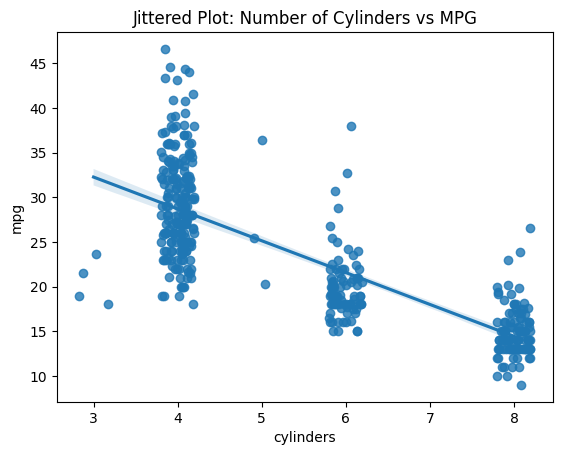

In [8]:
sns.regplot(data=mpg, x="cylinders", y="mpg", x_jitter=0.2)
plt.title("Jittered Plot: Number of Cylinders vs MPG")

Alternatively, you can aggregate the data:


Text(0.5, 1.0, 'Aggregated Plot: Average MPG by Number of Cylinders')

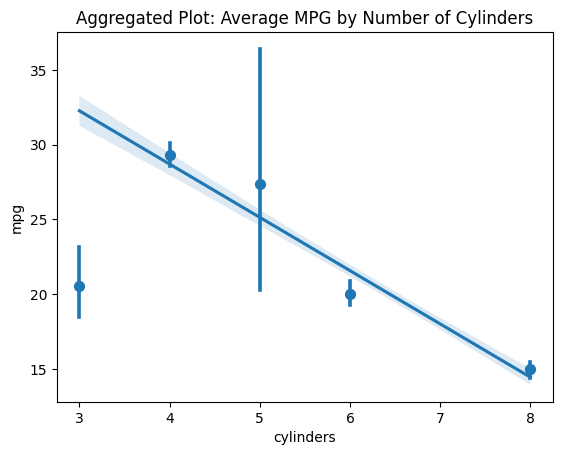

In [9]:
sns.regplot(data=mpg, x="cylinders", y="mpg", x_estimator=np.mean)
plt.title("Aggregated Plot: Average MPG by Number of Cylinders")

### <a id='toc1_3_'></a>[Binary Y Variables](#toc0_)


For binary outcomes, logistic regression is more appropriate:


Text(0, 0.5, 'Probability of USA Origin')

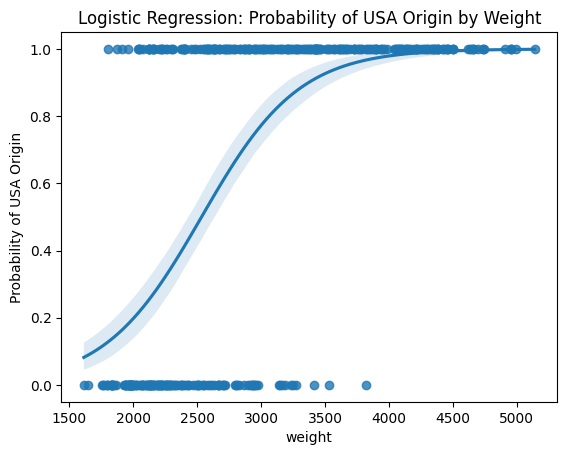

In [10]:
sns.regplot(x=mpg["weight"], y=(mpg["origin"] == "usa").astype(int), logistic=True)
plt.title("Logistic Regression: Probability of USA Origin by Weight")
plt.ylabel("Probability of USA Origin")

This plot shows the probability of a car being of USA origin based on its weight.


❗️ **Important Note:** Always consider the nature of your variables when choosing the appropriate regression technique.


### <a id='toc1_4_'></a>[Robust Regression](#toc0_)

When your data contains outliers that might unduly influence the regression, robust regression can be useful:


In [11]:
x = np.random.normal(0, 1, 100)
y = 0.5 * x + np.random.normal(0, 0.5, 100)

y[10] = 10
y[20] = -10
y[30] = 15
y[40] = -15
y[50] = 20
y[60] = -20
y[70] = 25
y[80] = -25
y[90] = 30

Text(0.5, 1.0, 'Simple Linear Relationship')

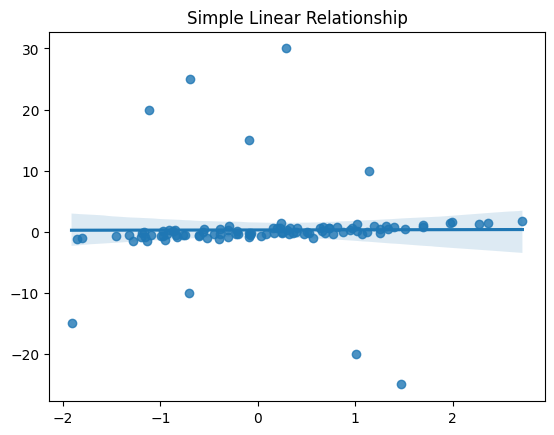

In [12]:
sns.regplot(x=x, y=y)
plt.title("Simple Linear Relationship")

Text(0.5, 1.0, 'Robust Regression: Simple Linear Relationship')

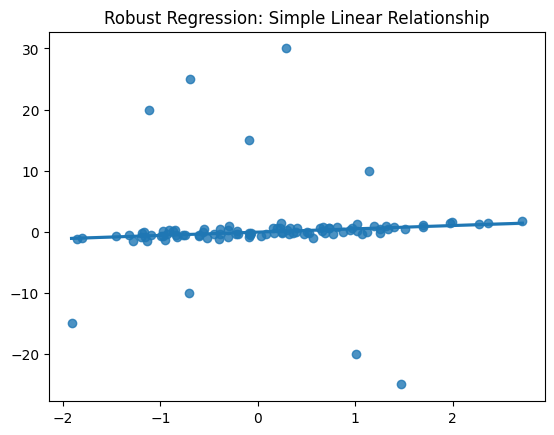

In [13]:
sns.regplot(x=x, y=y, robust=True)
plt.title("Robust Regression: Simple Linear Relationship")

This method is less sensitive to outliers compared to ordinary least squares regression.

When you set `robust=True` in `sns.regplot(x=x, y=y, robust=True)`, seaborn uses a technique called Huber Regression instead of OLS. Here are the key points about robust regression:

1. Purpose: It's designed to provide a more reliable fit when your data contains outliers or influential points that might skew a standard linear regression.

2. Method: Huber Regression is a type of robust regression that combines the benefits of squared error loss (like OLS) for most data points and absolute error loss for outliers.

3. Functionality: It works by giving less weight to data points that are far from the model predictions, effectively reducing the impact of outliers on the regression line.

4. Advantages:
   - Less affected by outliers compared to OLS
   - Provides a more reliable estimate of the relationship between variables when data is noisy or contains anomalies

5. Disadvantages:
   - Can be computationally more intensive than OLS
   - Might not be as efficient as OLS when the data actually follows normal distribution without significant outliers

6. Visual Impact: When using `robust=True`, you might notice that the regression line in your plot is less influenced by extreme data points compared to the default OLS line.

`regplot()` is a powerful and flexible function for visualizing relationships between variables. By understanding its various options and when to apply them, you can create informative and visually appealing regression plots that effectively communicate your data insights.


In the next sections, we'll explore `lmplot()` figure-level functions for more complex visualizations.

## <a id='toc2_'></a>[Regression Visualization with `lmplot()`](#toc0_)

The `lmplot()` function in Seaborn is a powerful tool for creating regression plots across multiple subgroups in your data. It combines the functionality of `regplot()` with `FacetGrid`, allowing for more complex and informative visualizations.


🔑 **Key Concept:** `lmplot()` excels at creating comparative regression visualizations across different subsets of your data.


Let's start with a basic example using the 'penguins' dataset, which contains measurements of different penguin species:


Text(0.5, 1.0, 'Relationship between Bill Length and Depth in Penguins')

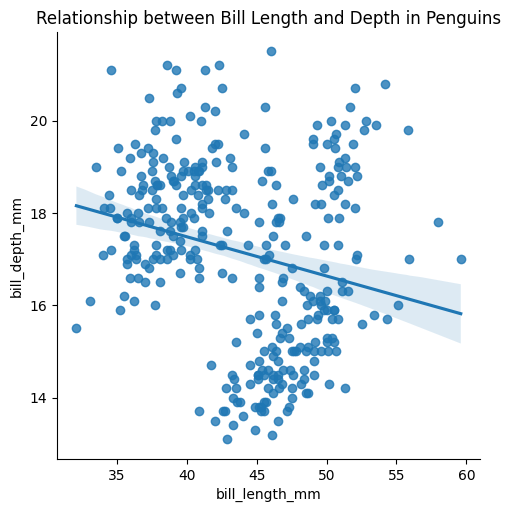

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
penguins = sns.load_dataset("penguins")

# Create a basic lmplot
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
plt.title("Relationship between Bill Length and Depth in Penguins")

This plot shows the relationship between bill length and bill depth for all penguins in the dataset. The scatter points represent individual penguins, while the blue line is the fitted regression line.


`lmplot()` is particularly useful when you want to:

1. Visualize regression relationships across different subgroups or categories in your data
2. Compare regression fits between different levels of categorical variables
3. Create multi-panel plots that show how relationships vary across different conditions
4. Explore interactions between variables in your dataset

However, it might not be the best choice when:

1. You're working with a simple bivariate relationship (use `regplot()` instead)
2. You need more control over individual plot elements (consider using `regplot()` with `FacetGrid` directly)
3. Your dataset is very large, as `lmplot()` can be computationally intensive


### <a id='toc2_1_'></a>[Exploring Subgroups with `lmplot()`](#toc0_)


One of the main advantages of `lmplot()` is its ability to visualize relationships across different subgroups:

1. Using Hue for Categorical Variables


Text(0.5, 1.0, 'Bill Dimensions by Penguin Species')

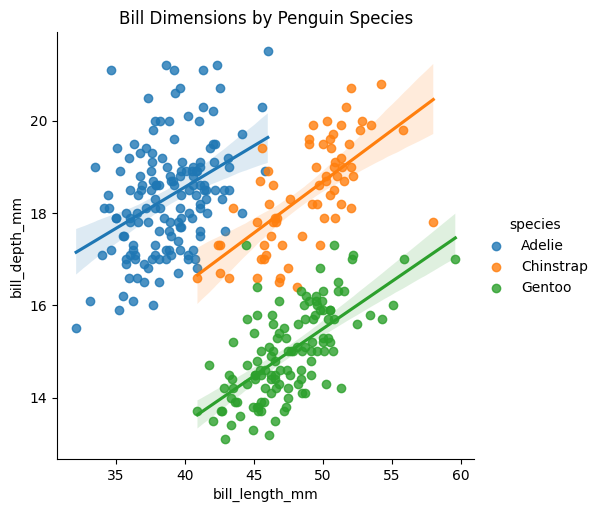

In [15]:
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.title("Bill Dimensions by Penguin Species")

This plot shows separate regression lines for each penguin species, allowing for easy comparison of relationships across species.


2. Using Columns for Faceting


Text(0.5, 1.05, 'Bill Dimensions by Penguin Species')

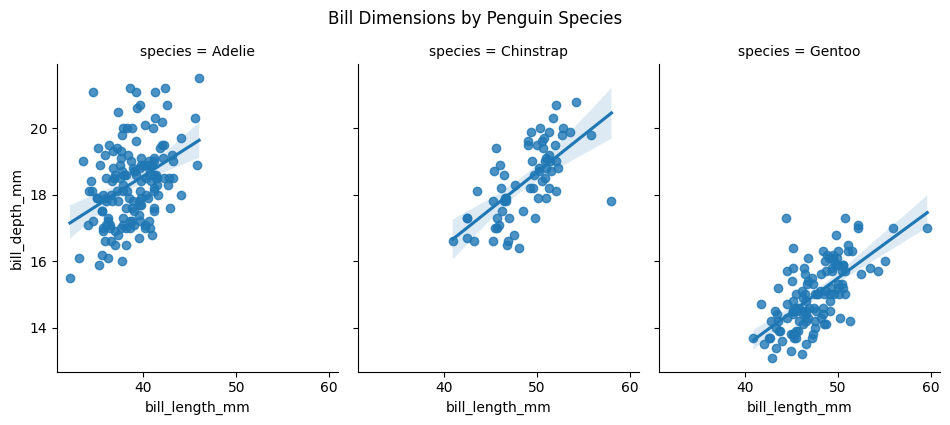

In [16]:
sns.lmplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    col="species",
    height=4,
    aspect=0.8,
)
plt.suptitle("Bill Dimensions by Penguin Species", y=1.05)

This creates separate subplots for each species, providing a clearer view of each group's specific relationship.


🤔 **Why This Matters:** Faceting allows you to identify how relationships might vary across different categories, potentially revealing important interactions or group-specific trends.


3. Combining Hue and Columns


Text(0.5, 1.05, 'Bill Dimensions by Species and Sex')

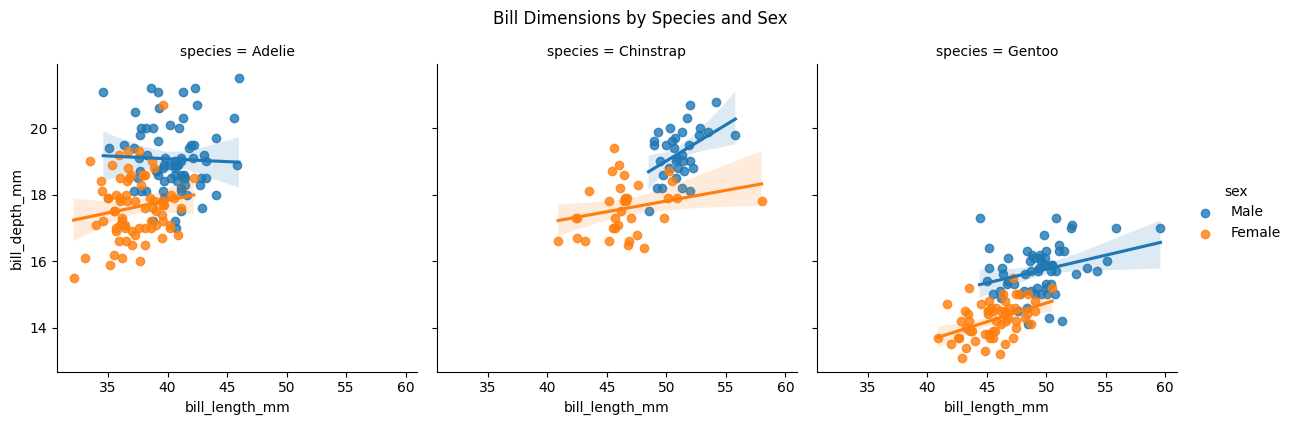

In [17]:
sns.lmplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="sex",
    col="species",
    height=4,
    aspect=1,
)
plt.suptitle("Bill Dimensions by Species and Sex", y=1.05)

This complex plot shows the relationships between bill dimensions for each species, further broken down by sex.


### <a id='toc2_2_'></a>[Customizing `lmplot()`](#toc0_)


`lmplot()` offers various customization options to enhance your visualizations:

1. Adjusting Plot Aesthetics


Text(0.5, 1.0, 'Customized lmplot: Bill Dimensions by Species')

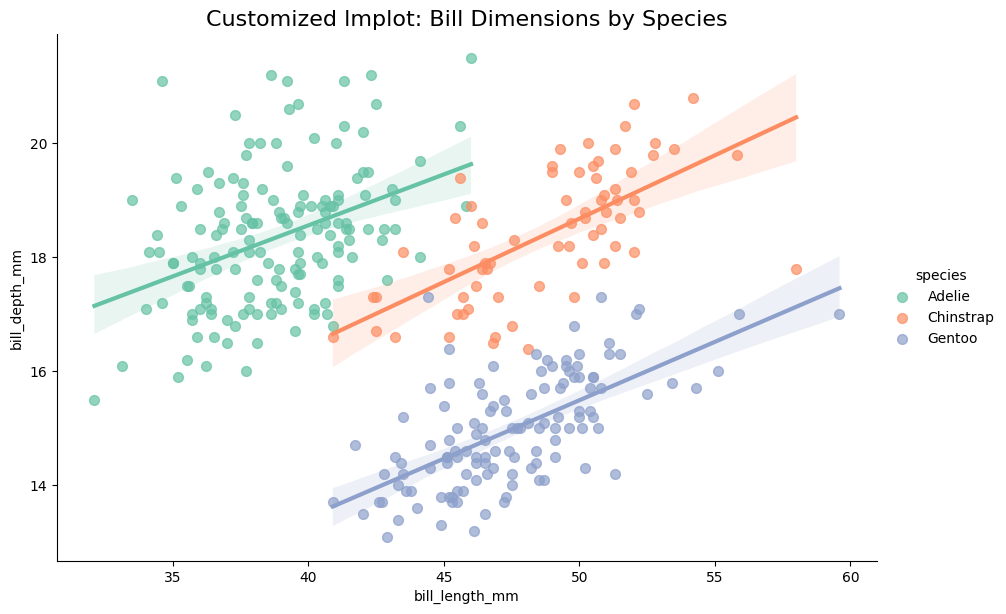

In [18]:
sns.lmplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    height=6,
    aspect=1.5,
    palette="Set2",
    scatter_kws={"s": 50, "alpha": 0.7},
    line_kws={"linewidth": 3},
)
plt.title("Customized lmplot: Bill Dimensions by Species", fontsize=16)

This example demonstrates how to adjust the plot size, color palette, and appearance of both scatter points and regression lines.


2. Modifying Regression Fit


You can apply the same regression modifications as in `regplot()`:


Text(0.5, 1.05, 'Non-linear Regression: Body Mass vs Bill Length')

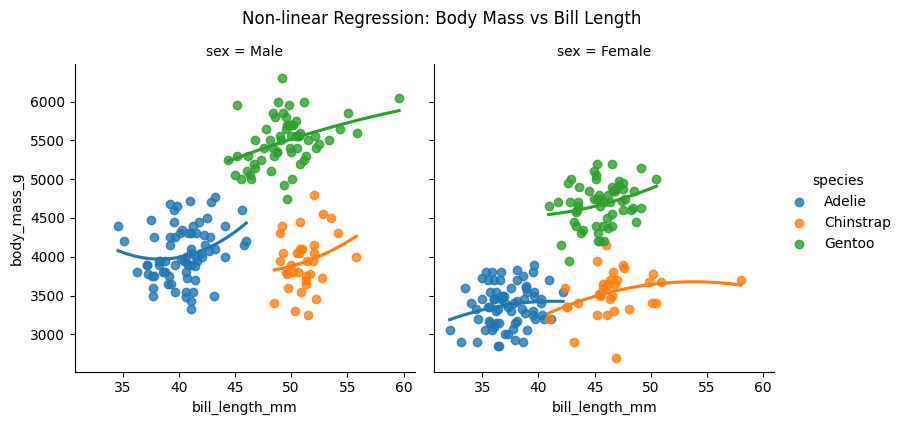

In [19]:
sns.lmplot(
    data=penguins,
    x="bill_length_mm",
    y="body_mass_g",
    hue="species",
    col="sex",
    height=4,
    aspect=1,
    order=2,  # Polynomial regression
    ci=None,  # Remove confidence interval
)
plt.suptitle("Non-linear Regression: Body Mass vs Bill Length", y=1.05)

This plot uses a second-order polynomial regression and removes the confidence interval for clarity.


❗️ **Important Note:** Always consider whether a more complex model (like polynomial regression) is justified by your data and research question.


3. Controlling Axis Limits


By default, `lmplot()` uses the same axis limits across all facets. You can change this behavior:


Text(0.5, 1.05, 'Independent Axes for Each Species')

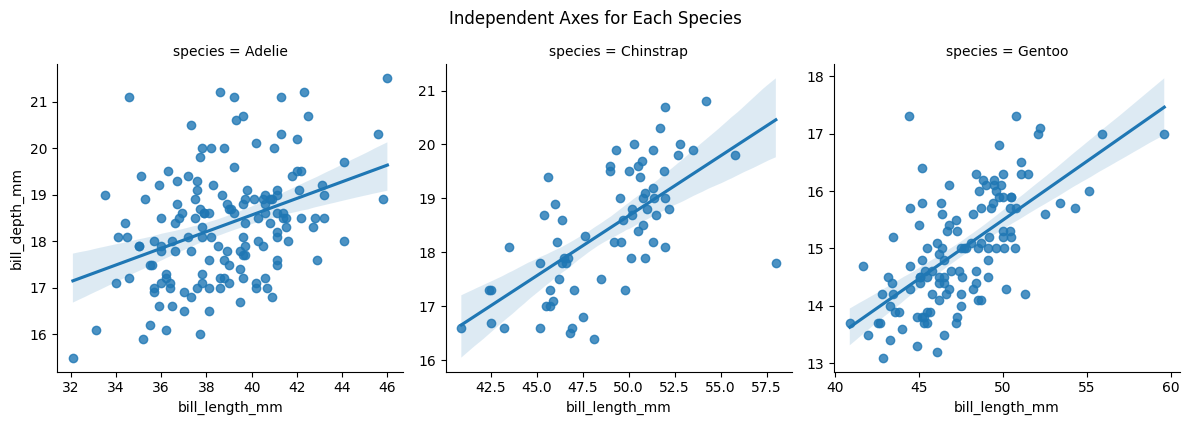

In [20]:
sns.lmplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    col="species",
    height=4,
    aspect=1,
    facet_kws={"sharex": False, "sharey": False},
)
plt.suptitle("Independent Axes for Each Species", y=1.05)

This allows each subplot to have its own axis limits, which can be useful for seeing detail in each group.


`lmplot()` is a powerful function for creating complex, multi-faceted regression visualizations. It's particularly useful when you need to compare relationships across different subgroups or conditions in your data. By mastering `lmplot()`, you can create rich, informative visualizations that effectively communicate the nuances of your data relationships.


Remember, while `lmplot()` offers great flexibility, it's important to balance the complexity of your visualization with clarity and interpretability. Always consider your audience and the key message you want to convey when designing your plots.

## <a id='toc3_'></a>[Residual Analysis with `residplot()`](#toc0_)

Residual analysis is a crucial step in assessing the quality of a regression model. Seaborn's `residplot()` function provides a powerful tool for visualizing residuals, helping data scientists and analysts to identify potential issues with their linear regression models.


🔑 **Key Concept:** Residual plots help validate the assumptions of linear regression and can reveal potential issues with your model that may not be apparent from the regression plot alone.


Before we dive into `residplot()`, let's quickly review what residuals are:

Residuals are the differences between the observed values of the dependent variable (y) and the predicted values (ŷ) from the regression model. In mathematical terms:

$residual = y - ŷ$


In an ideal linear regression model:
- Residuals should be randomly scattered around zero
- There should be no clear pattern in the residuals
- The spread of residuals should be roughly constant across all levels of the predictor variable


Let's start with a basic example using the 'mpg' dataset:


Text(0, 0.5, 'Residuals')

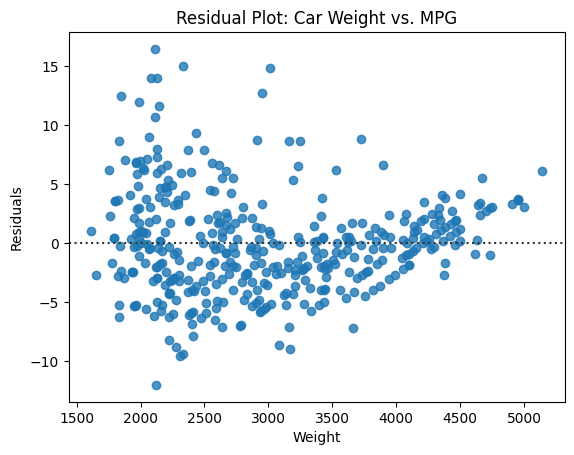

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
mpg = sns.load_dataset("mpg")

# Create a basic residual plot
sns.residplot(data=mpg, x="weight", y="mpg")
plt.title("Residual Plot: Car Weight vs. MPG")
plt.xlabel("Weight")
plt.ylabel("Residuals")

This plot shows the residuals of a linear regression model predicting MPG based on car weight. The horizontal line at y=0 represents where the residuals would fall if the model predictions were perfect.


💡 **Pro Tip:** Look for any patterns or trends in the residuals. A good model should show residuals randomly scattered around the zero line.


`residplot()` is particularly useful when you want to:

1. Check the assumptions of linear regression
2. Identify patterns or structure in the residuals
3. Detect heteroscedasticity (non-constant variance of residuals)
4. Spot potential outliers or influential points
5. Assess whether a linear model is appropriate for your data

However, it might not be the best choice when:

1. You're dealing with very large datasets where overplotting becomes an issue
2. You need to perform formal statistical tests for model assumptions
3. You're working with non-linear regression models


### <a id='toc3_1_'></a>[Interpreting Residual Plots](#toc0_)


Let's look at different scenarios and what they might indicate:


1. Ideal Residual Plot


Text(0.5, 1.0, 'Ideal Residual Plot')

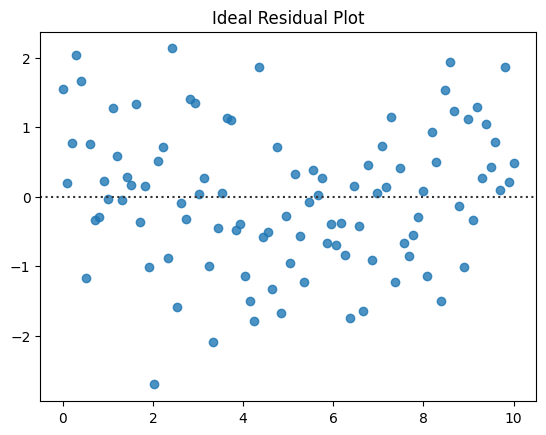

In [22]:
# Simulating an ideal scenario
import numpy as np

np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, 100)

sns.residplot(x=x, y=y)
plt.title("Ideal Residual Plot")

In this ideal scenario, residuals are randomly scattered around zero with no clear pattern. This suggests that the linear model is appropriate and its assumptions are met.


2. Non-linear Relationship


Text(0.5, 1.0, 'Residual Plot: Horsepower vs. MPG')

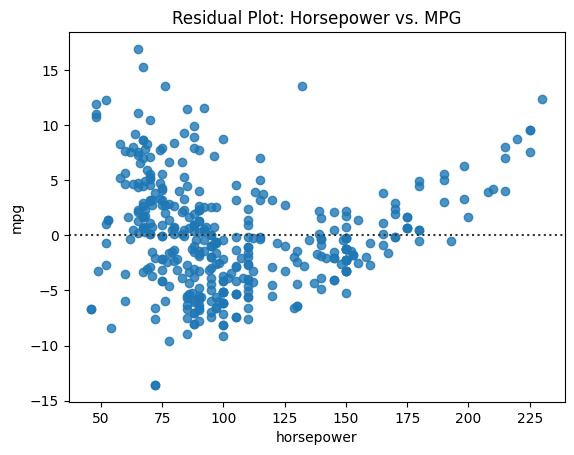

In [23]:
sns.residplot(data=mpg, x="horsepower", y="mpg")
plt.title("Residual Plot: Horsepower vs. MPG")

If you see a clear curved pattern in the residuals, it suggests that a linear model may not be appropriate, and you might need to consider a non-linear relationship.


🤔 **Why This Matters:** Identifying non-linear relationships can lead to more accurate models and better predictions.


3. Heteroscedasticity


Text(0.5, 1.0, 'Residual Plot with Heteroscedasticity')

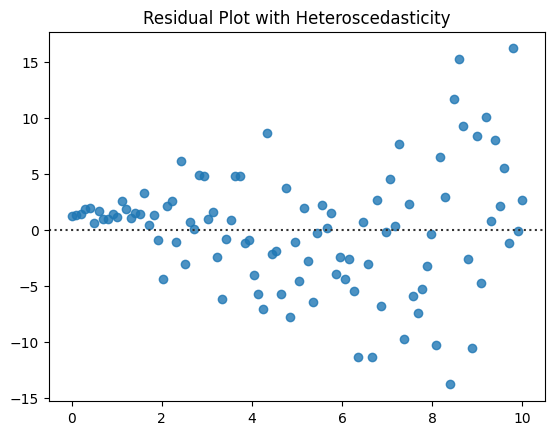

In [24]:
# Simulating heteroscedasticity
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, x, 100)

sns.residplot(x=x, y=y)
plt.title("Residual Plot with Heteroscedasticity")

If the spread of residuals increases or decreases with the x-variable, it indicates heteroscedasticity which means that the variance of the residuals is not constant across all levels of the predictor variable. This violates one of the assumptions of linear regression and may require transformation of variables or use of weighted least squares.


### <a id='toc3_2_'></a>[Advanced Usage of `residplot()`](#toc0_)


1. Adding a LOWESS Smoother


Text(0.5, 1.0, 'Residual Plot with LOWESS Smoother')

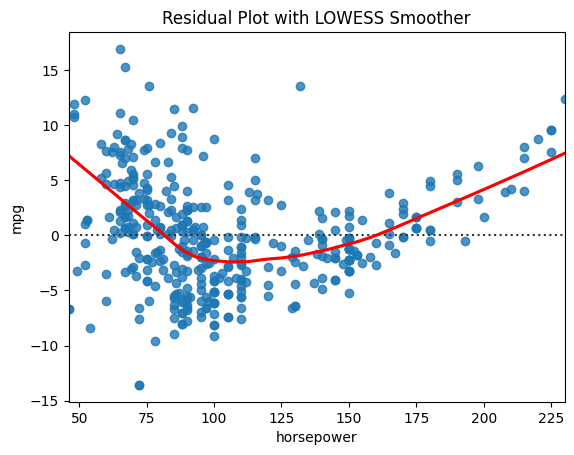

In [25]:
sns.residplot(data=mpg, x="horsepower", y="mpg", lowess=True, line_kws=dict(color="r"))
plt.title("Residual Plot with LOWESS Smoother")

Adding a LOWESS (Locally Weighted Scatterplot Smoothing) curve can help reveal subtle patterns in the residuals that might be hard to see otherwise.


2. Higher-Order Models


In [26]:
x = np.random.normal(0, 1, 100)
y = 0.1 + x**2 + np.random.normal(0, 1, 100)

Text(0.5, 1.0, 'Residual Plot for Quadratic Model')

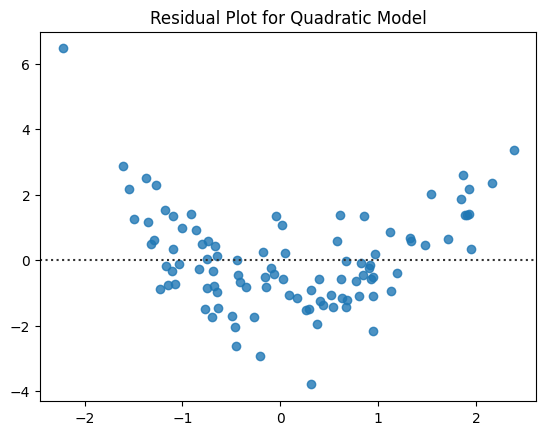

In [27]:
sns.residplot(x=x, y=y, order=1)
plt.title("Residual Plot for Quadratic Model")

Text(0.5, 1.0, 'Residual Plot for Quadratic Model')

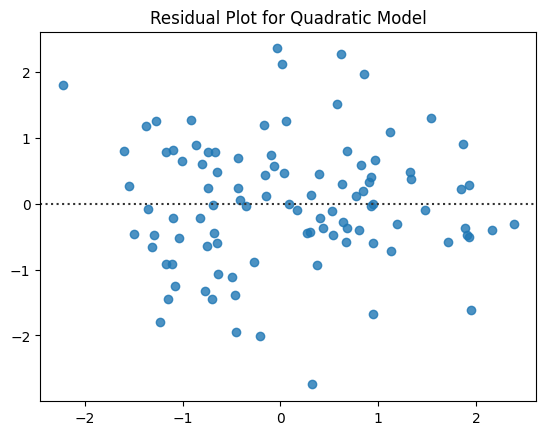

In [28]:
sns.residplot(x=x, y=y, order=2)
plt.title("Residual Plot for Quadratic Model")

By setting `order=2`, we fit a quadratic model instead of a linear one. This can sometimes resolve issues with non-linearity.


❗️ **Important Note:** While higher-order models can improve fit, be cautious of overfitting. Always consider the complexity of your model in relation to your data and research question.


3. Robust Regression


Text(0.5, 1.0, 'Residual Plot with Robust Regression')

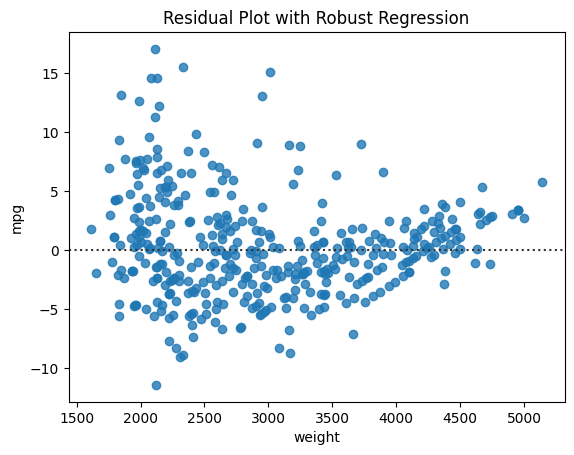

In [29]:
sns.residplot(data=mpg, x="weight", y="mpg", robust=True)
plt.title("Residual Plot with Robust Regression")

Robust regression can be useful when your data contains outliers that might unduly influence a standard least squares regression.


Residual analysis is a crucial step in the regression modeling process. Seaborn's `residplot()` function provides an easy and effective way to visualize residuals, helping you to:

1. Validate the assumptions of your linear regression model
2. Identify potential issues like non-linearity or heteroscedasticity
3. Detect outliers or influential points
4. Assess the overall fit of your model


By incorporating residual plots into your analysis workflow, you can ensure that your regression models are not just fitting the data, but doing so in a way that meets the underlying assumptions of linear regression. This leads to more reliable models and, ultimately, more trustworthy insights from your data.


Remember, while visual inspection of residuals is invaluable, it should be complemented by formal statistical tests when making critical decisions about model validity and selection.

## <a id='toc4_'></a>[Regression in Other Contexts: `jointplot()` and `pairplot()`](#toc0_)

While `regplot()` and `lmplot()` are the primary functions for creating regression plots in Seaborn, the library also offers ways to incorporate regression analysis into other types of visualizations. Two particularly useful functions in this context are `jointplot()` and `pairplot()`. These functions allow you to combine regression analysis with distribution plots and pairwise relationship visualizations, providing a more comprehensive view of your data.


### <a id='toc4_1_'></a>[`jointplot()`: Combining Regression with Marginal Distributions](#toc0_)


`jointplot()` creates a multi-panel figure that shows both a bivariate relationship between two variables and their individual univariate distributions.


🔑 **Key Concept:** `jointplot()` provides a comprehensive view of two variables' relationship and their individual distributions in a single, compact visualization.


Let's start with a basic example using the 'penguins' dataset:


Text(0.5, 1.02, 'Bill Length vs Depth with Marginal Distributions')

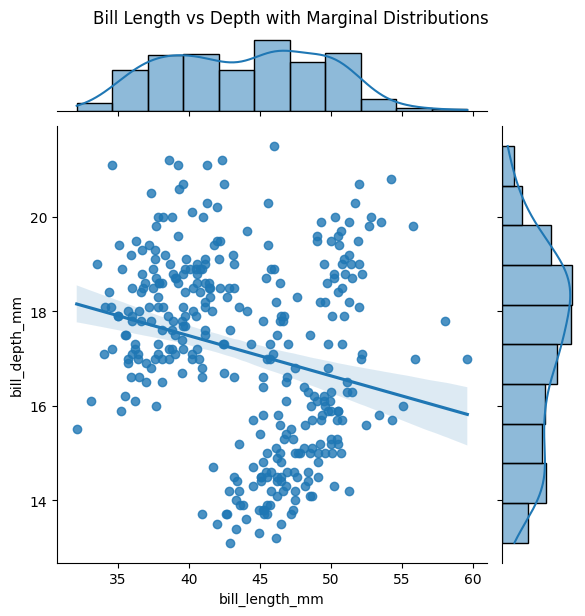

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
penguins = sns.load_dataset("penguins")

# Create a jointplot with a regression line
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")
plt.suptitle("Bill Length vs Depth with Marginal Distributions", y=1.02)

This plot shows:
- A scatter plot of bill length vs. bill depth in the main panel
- A regression line fitted to the data
- Histograms of bill length and bill depth on the respective axes


The `kind="reg"` parameter adds a regression line to the scatter plot. Without it, you'd get a simple scatter plot.


Use `jointplot()` when you want to:

1. Visualize the relationship between two variables along with their individual distributions
2. Combine a scatter plot with histogram or kernel density estimation (KDE) plots
3. Quickly assess both the correlation and distribution of two variables

However, it might not be the best choice when:

1. You need to visualize relationships among more than two variables at once
2. You're working with categorical data (although it can handle this to some extent)
3. You need a very customized or complex plot layout


`jointplot()` offers various customization options:


Text(0.5, 1.02, 'Customized Jointplot')

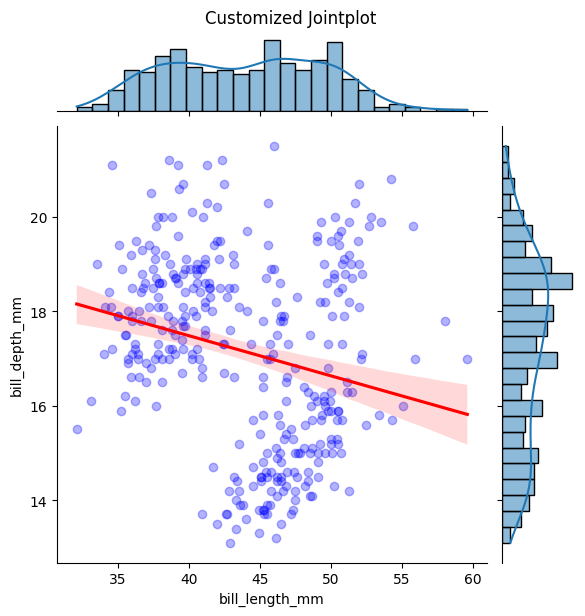

In [31]:
sns.jointplot(
    data=penguins, 
    x="bill_length_mm", 
    y="bill_depth_mm", 
    kind="reg",
    scatter_kws={"color": "blue", "alpha": 0.3},
    line_kws={"color": "red"},
    marginal_kws=dict(bins=25, fill=True)
)
plt.suptitle("Customized Jointplot", y=1.02)

This example demonstrates how to customize the colors, transparency, and marginal plot style.


🤔 **Why This Matters:** Combining the regression plot with marginal distributions provides context about the variables' distributions, which can be crucial for understanding the nature of their relationship.


### <a id='toc4_2_'></a>[`pairplot()`: Visualizing Pairwise Relationships](#toc0_)


`pairplot()` creates a grid of plots showing pairwise relationships across an entire dataset. It's particularly useful for exploring correlations between multiple variables simultaneously.


Let's create a basic `pairplot()` using the penguins dataset:


Text(0.5, 1.02, 'Pairwise Relationships in Penguins Dataset')

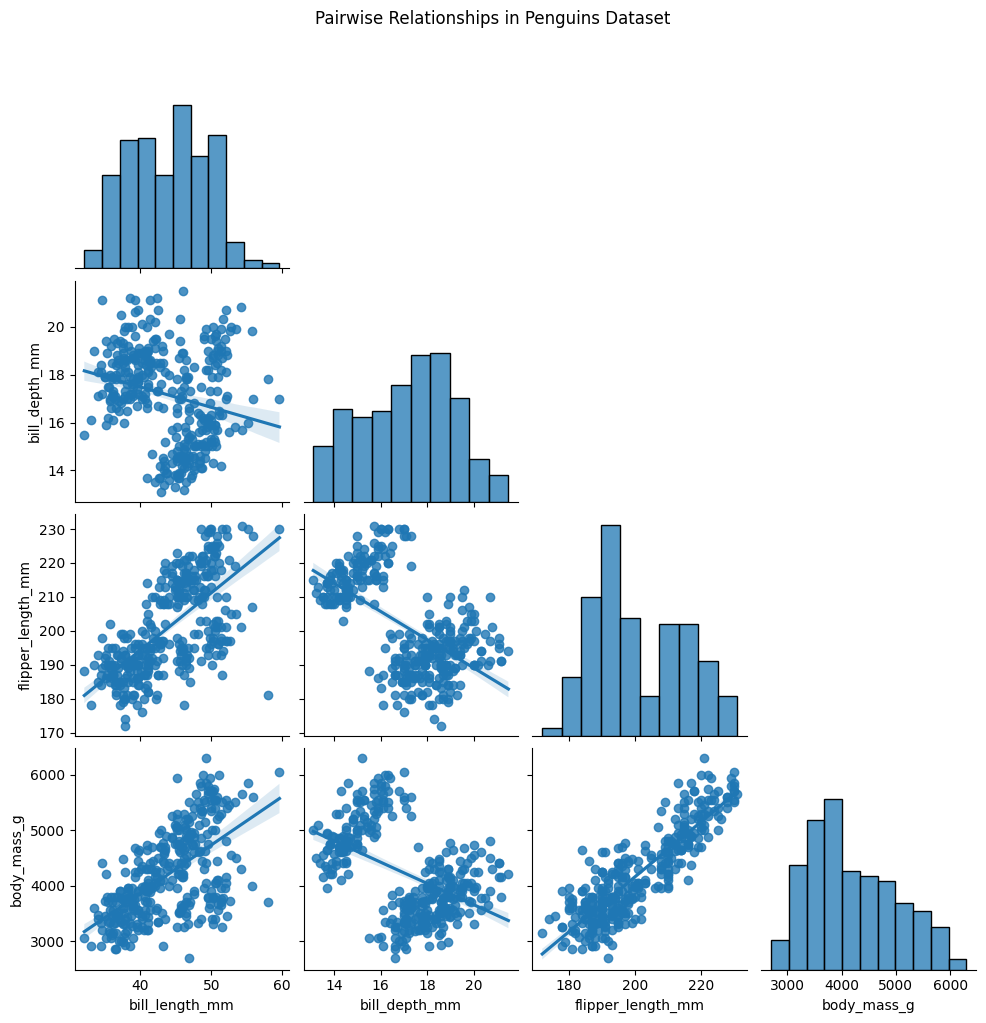

In [32]:
sns.pairplot(penguins, kind="reg", corner=True)
plt.suptitle("Pairwise Relationships in Penguins Dataset", y=1.02)

This plot shows:
- Scatter plots for each pair of numeric variables
- Regression lines fitted to each scatter plot
- Histograms for each variable along the diagonal


❗️ **Important Note:** `pairplot()` can be computationally intensive for large datasets. Use `corner=True` to show only the lower triangle of the plot matrix, reducing computation time and visual clutter.


Use `pairplot()` when you want to:

1. Explore relationships between multiple variables at once
2. Identify potential correlations or patterns across your entire dataset
3. Get a quick overview of your data's structure and relationships

However, it might not be the best choice when:

1. You're working with a very large number of variables (the plot can become cluttered)
2. You need to focus on specific relationships in detail
3. Your dataset includes many categorical variables


You can enhance your `pairplot()` by adding hue differentiation and customizing plot elements:


Text(0.5, 1.02, 'Pairwise Relationships by Species')

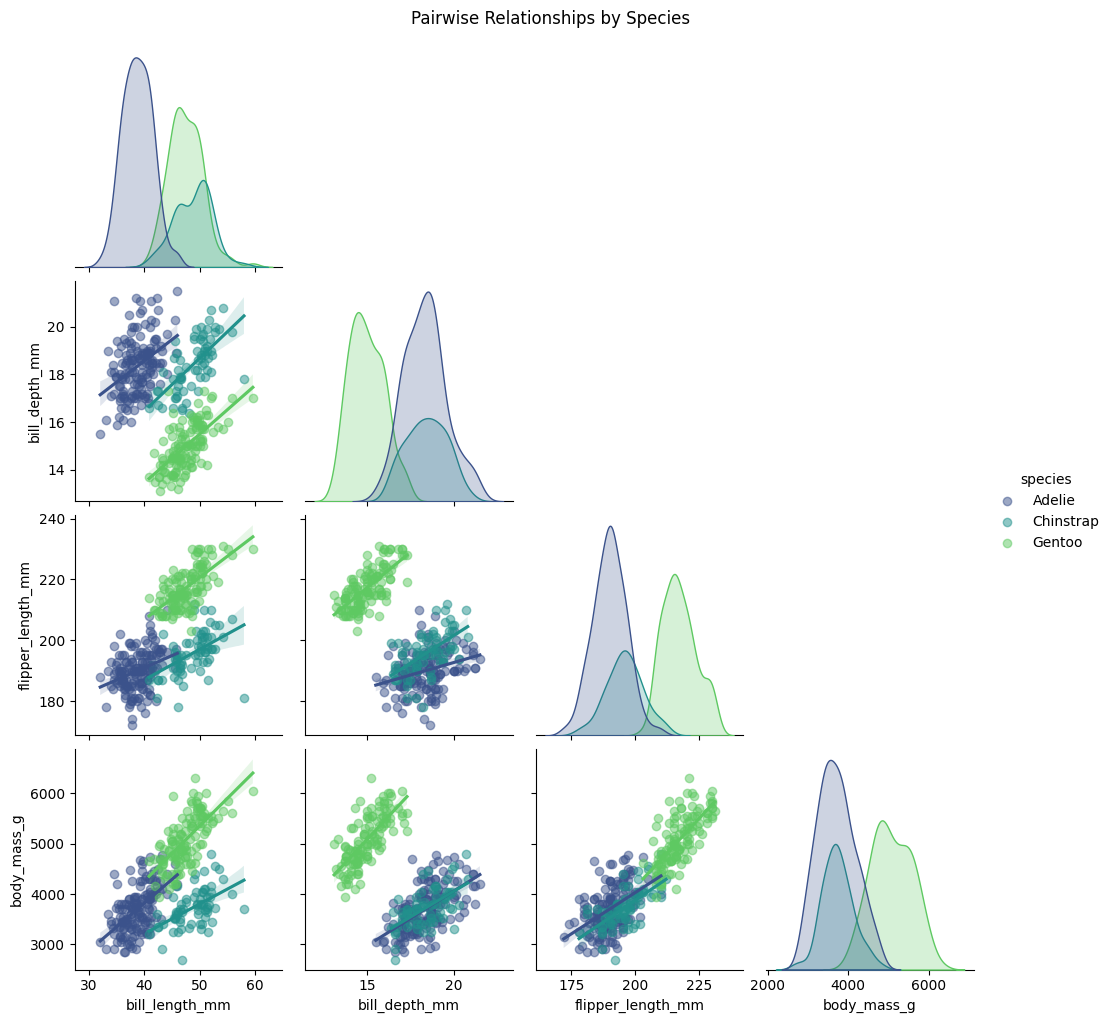

In [33]:
sns.pairplot(
    penguins, 
    kind="reg",
    hue="species",
    palette="viridis",
    plot_kws={"scatter_kws": {"alpha": 0.5}},
    corner=True
)
plt.suptitle("Pairwise Relationships by Species", y=1.02)

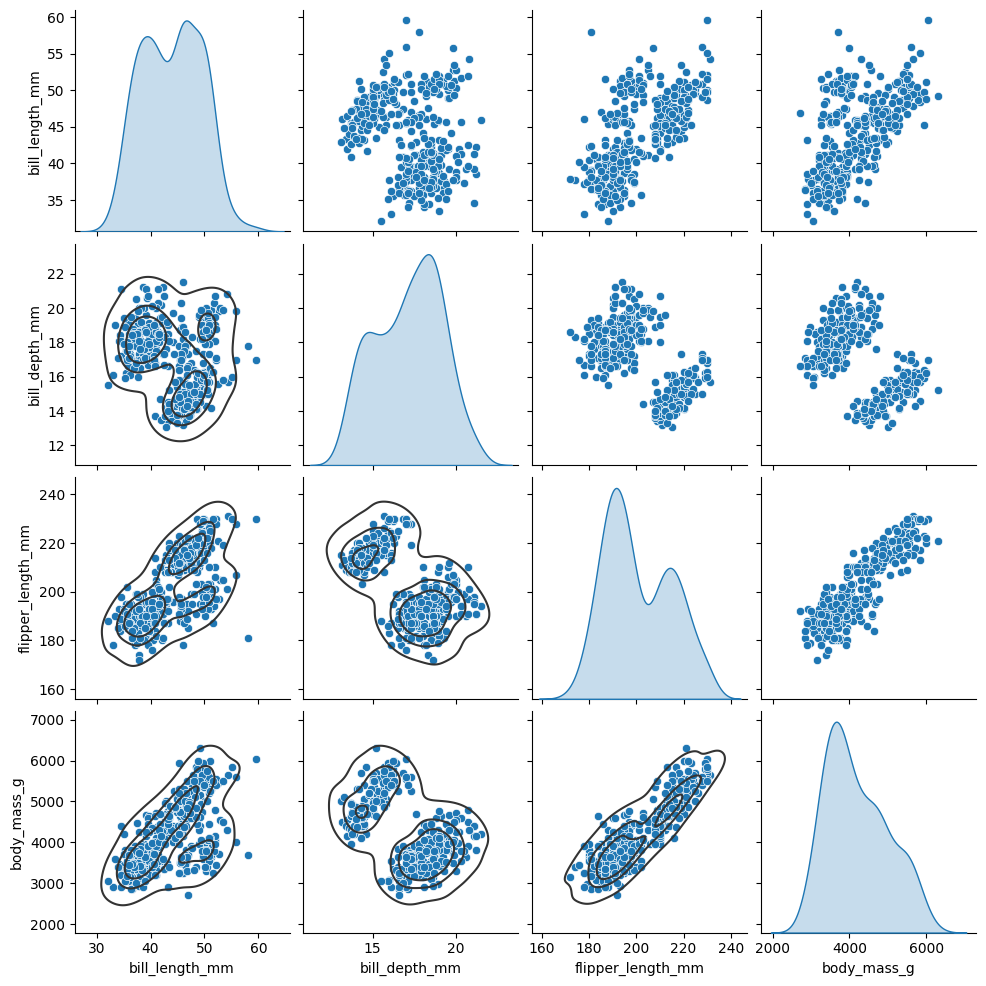

In [34]:
g = sns.pairplot(penguins, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

This example colors the data points by species and adjusts the transparency of scatter points.


💡 **Pro Tip:** Use the `vars` parameter to select specific variables if you don't want to plot all numeric columns.


`jointplot()` and `pairplot()` are powerful tools for incorporating regression analysis into more complex visualizations. They allow you to:

1. Visualize relationships between variables in the context of their distributions
2. Explore pairwise relationships across multiple variables simultaneously
3. Combine regression analysis with other plot types like hexbin or KDE plots


By using these functions, you can create rich, informative visualizations that provide a comprehensive view of your data's structure and relationships. Remember to consider the size and nature of your dataset when choosing between these plot types, and always aim for clarity in your visualizations.


These advanced plotting techniques can significantly enhance your exploratory data analysis, helping you to uncover patterns and relationships that might not be apparent from simpler visualizations or summary statistics alone.

## <a id='toc5_'></a>[Summary](#toc0_)

Throughout this comprehensive exploration of regression plots in Seaborn, we've covered a wide range of tools and techniques for visualizing relationships between variables and fitting regression models. Let's recap the key points and provide some final thoughts on effectively using these powerful visualization tools. We have explored the following key functions and concepts:

1. **regplot()**: The foundational function for creating simple regression plots.
2. **lmplot()**: A figure-level function that combines regplot() with FacetGrid for more complex visualizations.
3. **residplot()**: Essential for assessing model fit and validating regression assumptions.
4. **jointplot()**: Combines regression analysis with marginal distributions.
5. **pairplot()**: Visualizes pairwise relationships across multiple variables.


Each of these functions serves a specific purpose in the data scientist's toolkit, offering unique insights into your data and models:

1. **Visualizing Relationships**: We learned how to effectively visualize the relationship between variables, uncovering linear and non-linear patterns.

2. **Model Assessment**: Through residual plots, we explored techniques for validating regression assumptions and identifying potential issues in our models.

3. **Comparative Analysis**: Using lmplot(), we discovered how to compare regression fits across different subgroups or categories in our data.

4. **Comprehensive Data Exploration**: With jointplot() and pairplot(), we combined regression analysis with distribution visualization for a more holistic view of our data.

5. **Customization**: Throughout, we explored various customization options to create clear, informative, and visually appealing plots.


Remember that visualization is an iterative process. Don't hesitate to create multiple versions of a plot to find the most effective way to communicate your insights.


While Seaborn's regression plotting functions are powerful, it's important to be aware of their limitations:

1. **Large Datasets**: Some functions (like pairplot()) may become computationally intensive with very large datasets.

2. **Complex Models**: These tools are primarily designed for simple linear regression. For more complex models, you might need to combine Seaborn with other libraries.

3. **Overreliance on Visualization**: While plots are invaluable, they should complement, not replace, formal statistical testing and model validation techniques.


In conclusion, Seaborn's regression plotting functions offer a powerful and flexible toolkit for data visualization and analysis. By understanding when and how to use each tool, you can gain deeper insights into your data, validate your models more effectively, and create compelling visual narratives of your analytical findings. Remember, the goal of data visualization is not just to create beautiful plots, but to reveal the stories hidden within your data. With practice and creativity, you'll be able to leverage these tools to their full potential in your data science projects.